## MPG ----> Miles Per Gallon

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [23]:
def agg_count(df, group_field):
    grouped = df.groupby(group_field, as_index=False).size()
    grouped = pd.DataFrame(grouped).reset_index()
    grouped.columns = [group_field, 'Count']
    grouped = grouped.sort_values('Count',ascending=False)
    return grouped

In [61]:
vehicles = pd.read_csv("v_clustered.csv")

In [5]:
vehicles_2016 = vehicles[vehicles['Year']==2016]

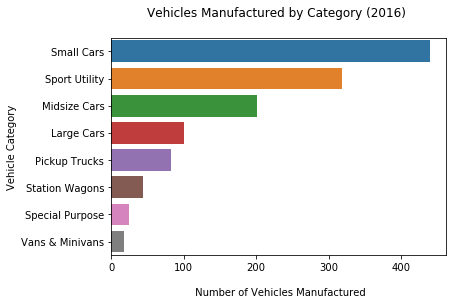

In [31]:
category_counts = agg_count(vehicles_2016, 'Vehicle Category')
ax = sns.barplot(data=category_counts, x='Count', y='Vehicle Category')
ax.set(xlabel='\n Number of Vehicles Manufactured')
ax.set_title('Vehicles Manufactured by Category (2016) \n')

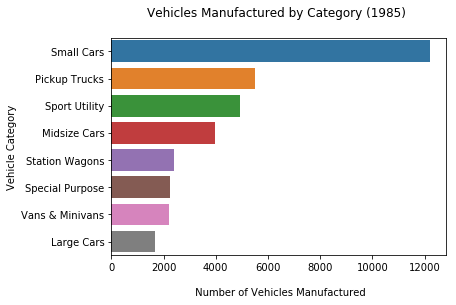

In [33]:
vehicles_1985 = vehicles[vehicles['Year']==1985]
category_counts = agg_count(vehicles, 'Vehicle Category')
ax = sns.barplot(data=category_counts,x='Count',y='Vehicle Category')
ax.set(xlabel='\n Number of Vehicles Manufactured')
ax.set_title('Vehicles Manufactured by Category (1985) \n')

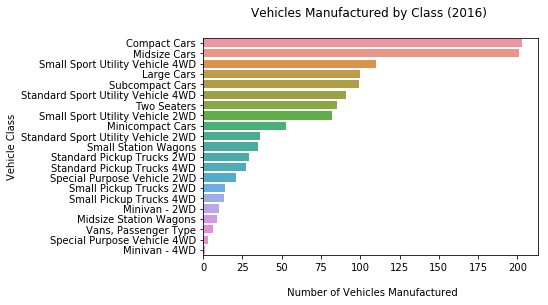

In [34]:
class_counts = agg_count(vehicles_2016, 'Vehicle Class')
ax = sns.barplot(data=class_counts, x='Count', y='Vehicle Class')
ax.set(xlabel='\n Number of Vehicles Manufactured')
ax.set_title('Vehicles Manufactured by Class (2016) \n')

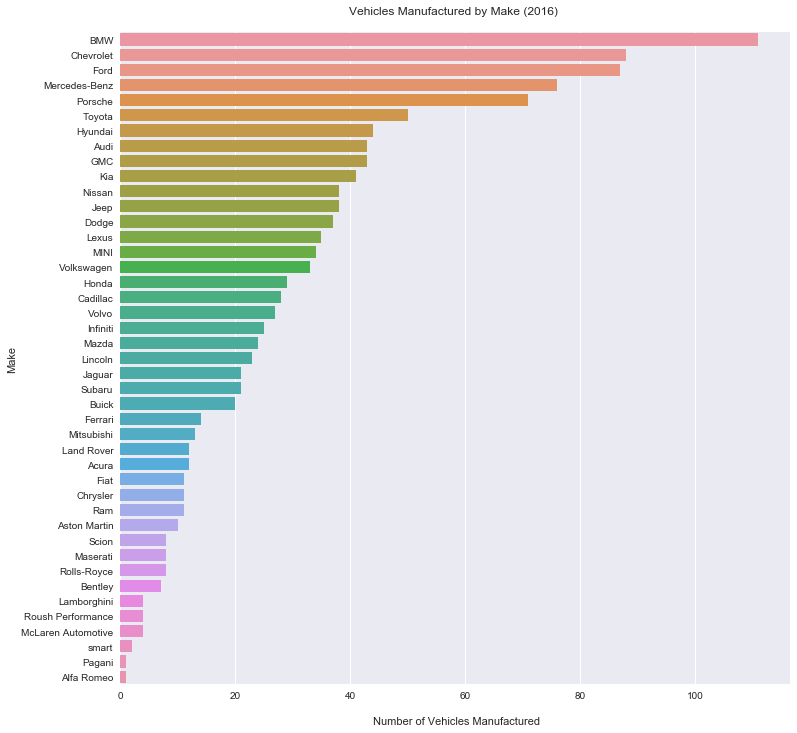

In [16]:
make_counts = agg_count(vehicles_2016, 'Make')

ax = sns.barplot(data=make_counts, x='Count', y='Make',)
sns.set(rc={"figure.figsize":(12,12)})
ax.set(xlabel='\n Number of Vehicles Manufactured')
ax.set_title('Vehicles Manufactured by Make (2016) \n')

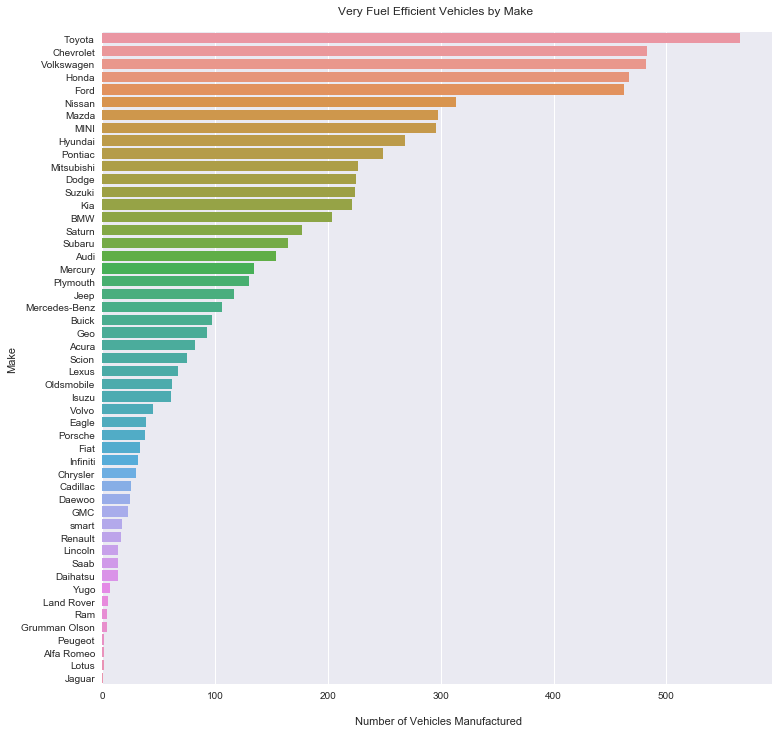

In [18]:
very_efficient = vehicles[vehicles['Fuel Efficiency']=='Very High Efficiency']
make_counts = agg_count(very_efficient, 'Make')

ax = sns.barplot(data=make_counts, x='Count', y='Make')
ax.set(xlabel='\n Number of Vehicles Manufactured')
ax.set_title('Very Fuel Efficient Vehicles by Make \n')

What if we wanted to perform some other calculation, such as averaging, instead of counting the number of records that fall into each group? We can just create a new function called <code>agg_avg </code>that calculates the mean of a designated numerical field.

In [20]:
def agg_avg(df, group_field, calc_field):
    # 算平均
    grouped = df.groupby(group_field, as_index=False)[calc_field].mean()
    # 设置列名 
    grouped.columns = [group_field, 'Avg ' + str(calc_field)]
    # 排序     
    grouped = grouped.sort_values('Avg '+str(calc_field),ascending=False)
    return grouped

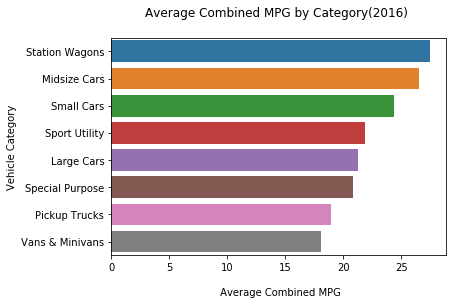

In [21]:
category_avg_mpg = agg_avg(vehicles_2016, "Vehicle Category", "Combined MPG")
ax = sns.barplot(data=category_avg_mpg, x="Avg Combined MPG", y="Vehicle Category")
ax.set(xlabel="\n Average Combined MPG")
ax.set_title('Average Combined MPG by Category(2016) \n')

### 获取更多信息（同时观察多个特征）
首先我们创造一个<code>pivot_count</code>与之前的<code>agg_count</code>差不多，会先给传进来的数据分组，然后计算我们给出的板块

In [22]:
def pivot_count(df, rows, columns, calc_field):
    df_pivot = df.pivot_table(values=calc_field,
                              index=rows,
                              columns=columns, 
                              aggfunc=np.size).dropna(axis=0, how='all')
    return df_pivot

In [29]:
effic_size_pivot = pivot_count(vehicles_2016,'Fuel Efficiency',
                               'Engine Size','Combined MPG')
effic_size_pivot

Engine Size,Large Engine,Moderate Engine,Small Engine,Very Large Engine,Very Small Engine
Fuel Efficiency,,,,,
High Efficiency,67.0,135.0,42.0,2.0,33.0
Low Efficiency,49.0,18.0,NaN,81.0,NaN
Moderate Efficiency,76.0,62.0,2.0,21.0,NaN
Very High Efficiency,2.0,69.0,97.0,NaN,373.0
Very Low Efficiency,23.0,4.0,NaN,72.0,NaN


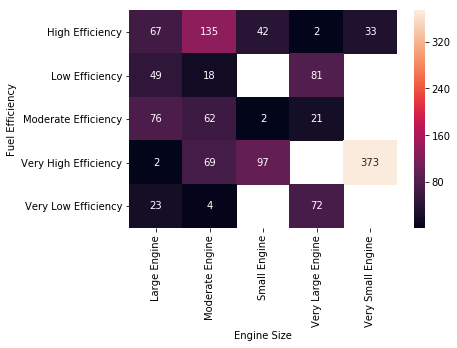

In [28]:
sns.heatmap(effic_size_pivot, annot=True, fmt='g')
ax.set(xlabel='\n Engine Size')
ax.set_title('Fuel Efficiency vs. Engine Size (2016) \n')

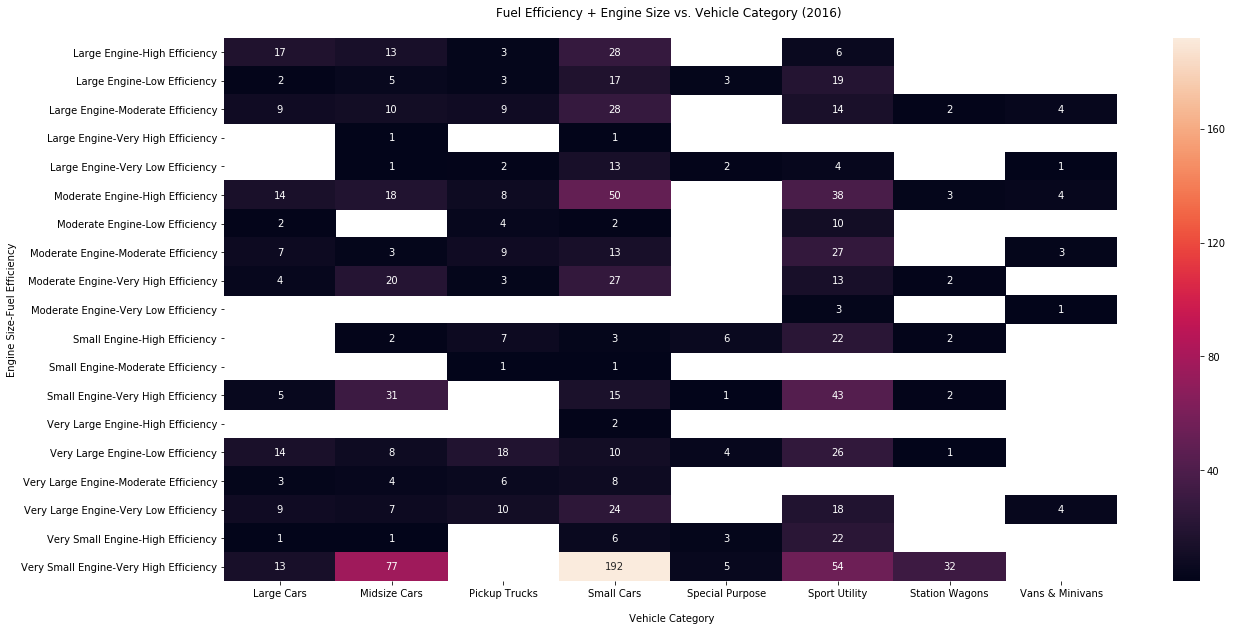

In [32]:
effic_size_category = pivot_count(vehicles_2016,
                                  ['Engine Size','Fuel Efficiency'],
                                  'Vehicle Category','Combined MPG')

fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(effic_size_category, annot=True, fmt='g')
ax.set(xlabel='\n Vehicle Category')
ax.set_title('Fuel Efficiency + Engine Size vs. Vehicle Category (2016) \n')

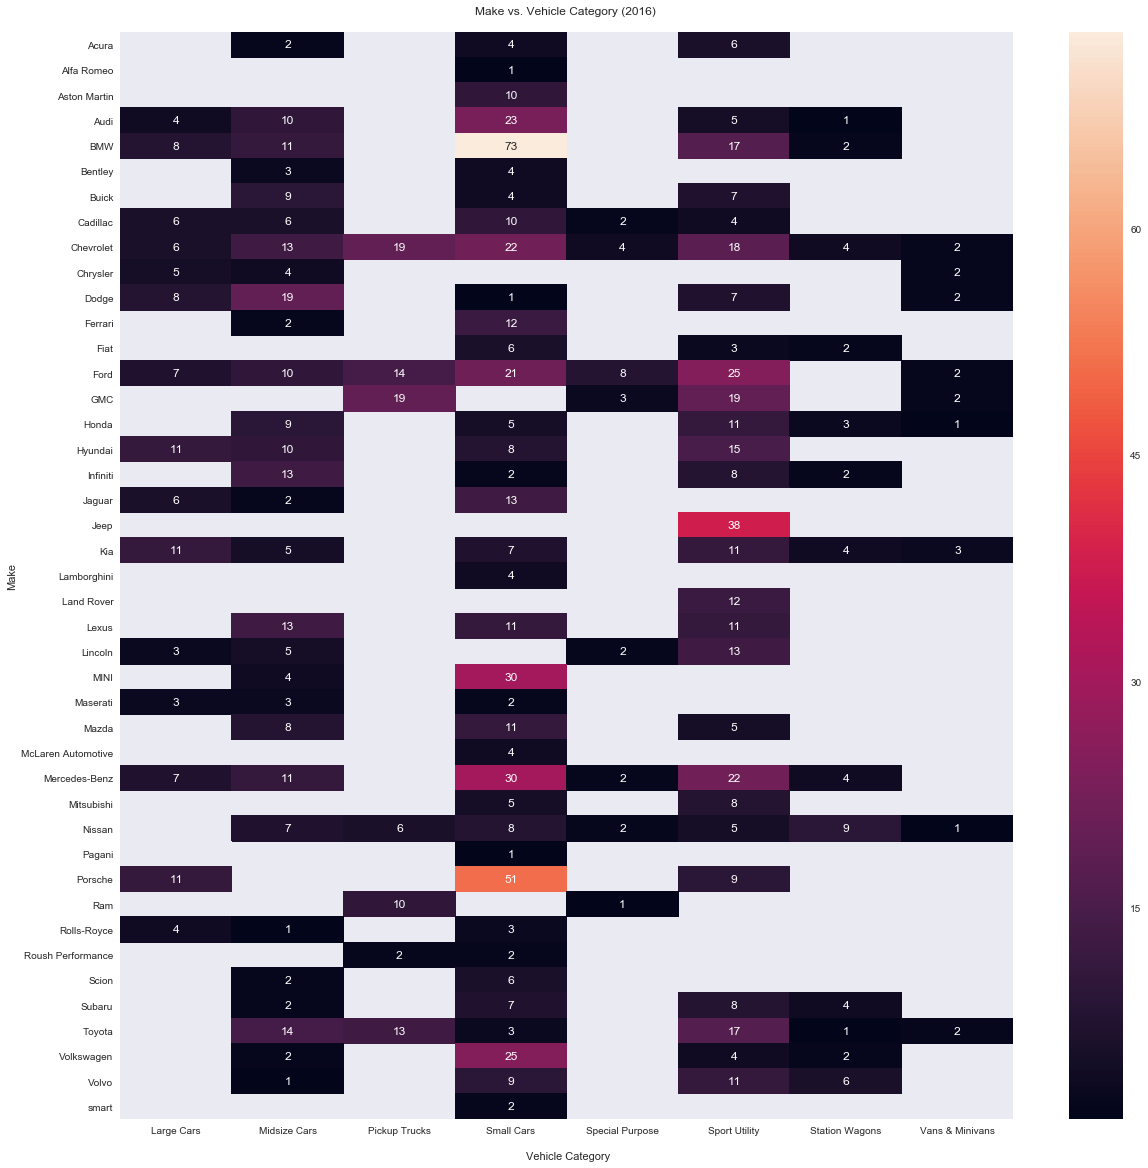

In [53]:
effic_size_pivot = pivot_count(vehicles_2016, 'Make',
                               'Vehicle Category','Combined MPG')

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(effic_size_pivot, annot=True, fmt='g')
ax.set(xlabel='\n Vehicle Category')
ax.set_title('Make vs. Vehicle Category (2016) \n')

### Visualizing Changes Over Time

In [44]:
def multi_line(df, x, y):
    ax = df.groupby([x,y]).size().unstack(y).plot(
        figsize=(15,8),cmap="Set2")

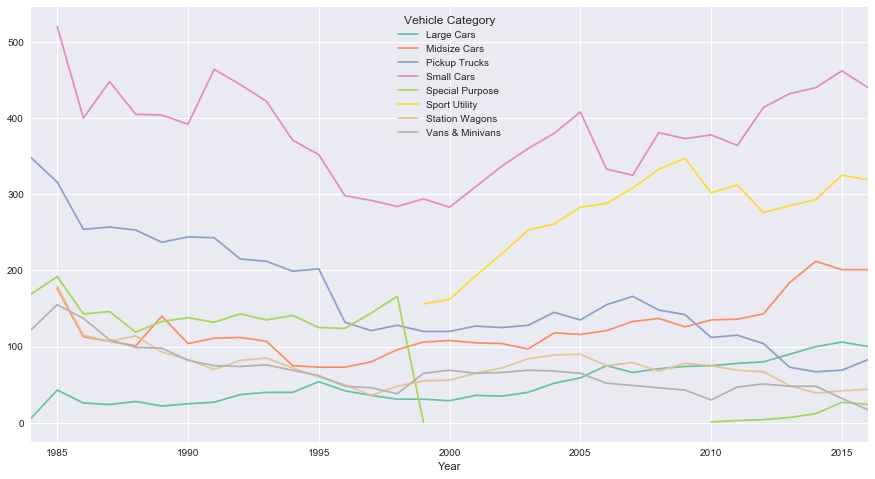

In [48]:
sns.set()
multi_line(vehicles,'Year','Vehicle Category')
ax.set(xlabel='\n Year')
ax.set_title('VehICLE Categories Over Time \n')

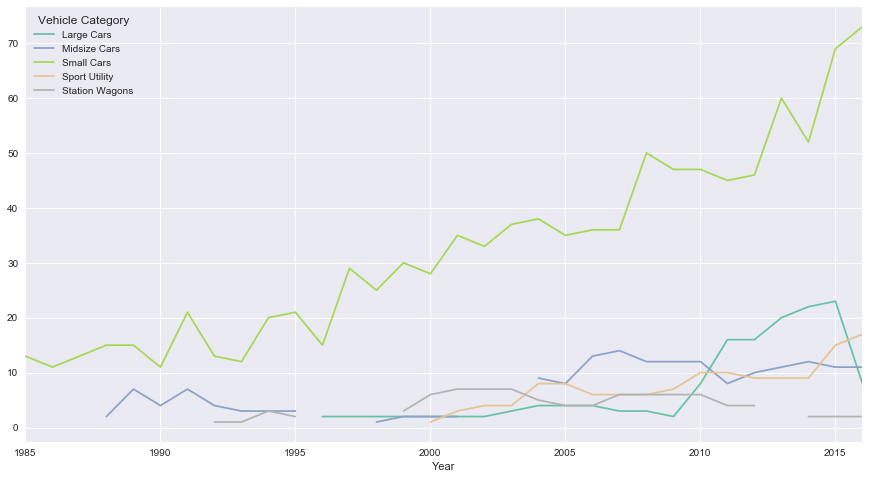

In [51]:
bmw = vehicles[vehicles['Make'] == 'BMW']
multi_line(bmw, 'Year', 'Vehicle Category')
ax.set(xlabel='\n Year')
ax.set_title('BMW Vehicle Categories Over Time')

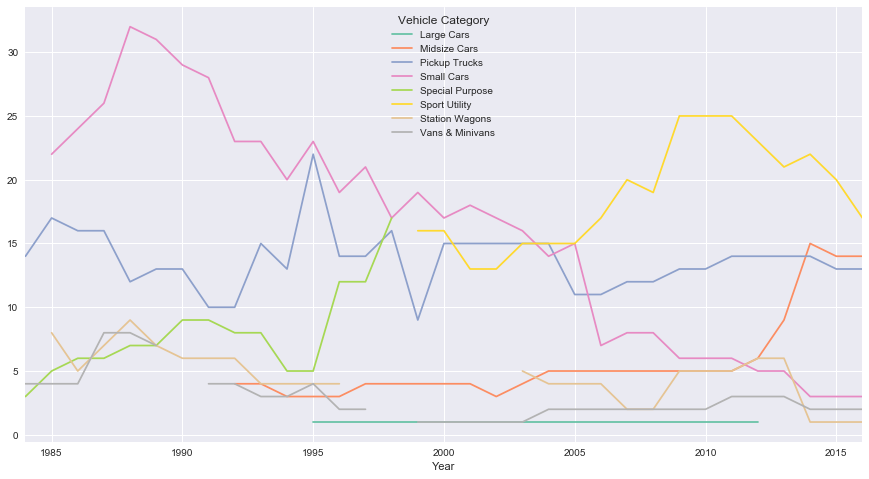

In [52]:
toyota = vehicles[vehicles['Make'] == 'Toyota']

multi_line(toyota, 'Year', 'Vehicle Category')
ax.set(xlabel='\n Year')
ax.set_title('Toyota Vehicle Categories Over Time \n')

In [60]:
vehicles.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year', 'Transmission Type',
       'Vehicle Category', 'Model Type', 'Gas', 'Ethanol', 'Electric',
       'Propane', 'Natural Gas', 'Gas Type', 'Fuel Efficiency', 'Engine Size',
       'Emissions', 'Fuel Cost'],
      dtype='object')

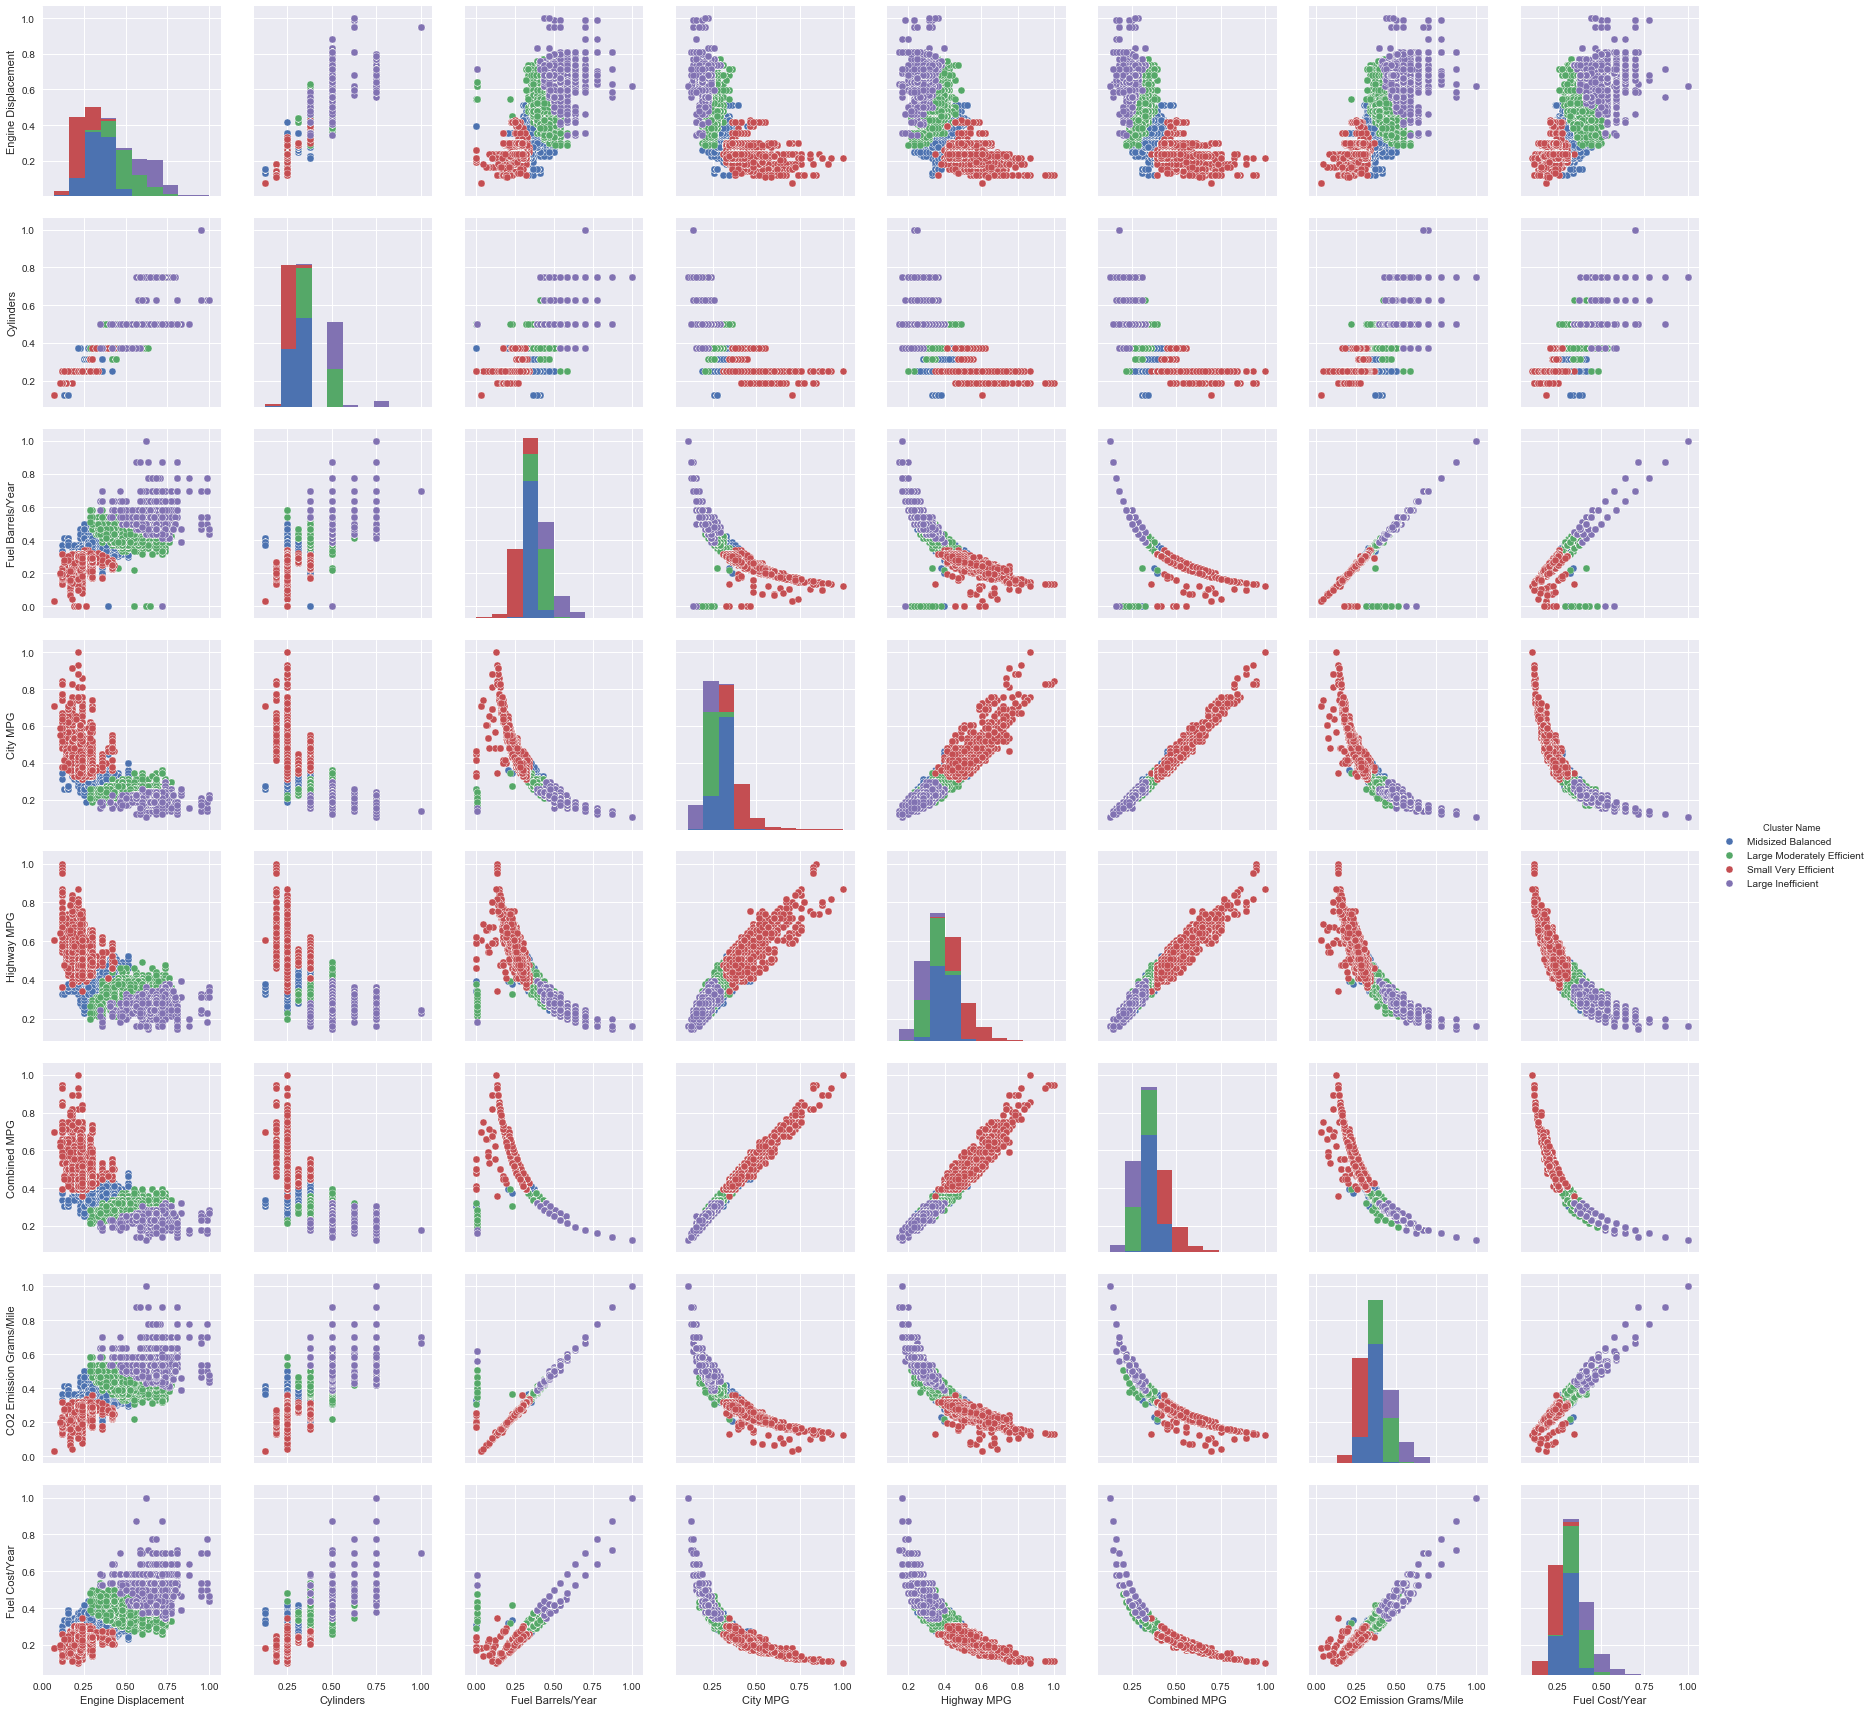

In [62]:
select_columns = ['Engine Displacement','Cylinders','Fuel Barrels/Year',
                   'City MPG','Highway MPG','Combined MPG',
                   'CO2 Emission Grams/Mile', 'Fuel Cost/Year', 'Cluster Name']

sns.pairplot(vehicles[select_columns], hue='Cluster Name', size=3)

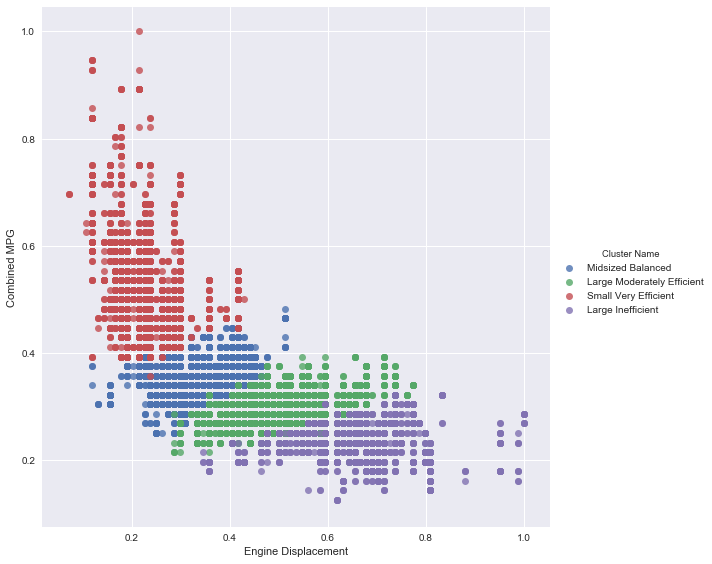

In [63]:
sns.lmplot('Engine Displacement', 'Combined MPG',
          data=vehicles, hue='Cluster Name',
           size=8, fit_reg=False)